<a href="https://colab.research.google.com/github/SaiButhongyou/229352-StatisticalLearning/blob/main/229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [ ]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-09 17:48:12--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-09 17:48:12 (51.0 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


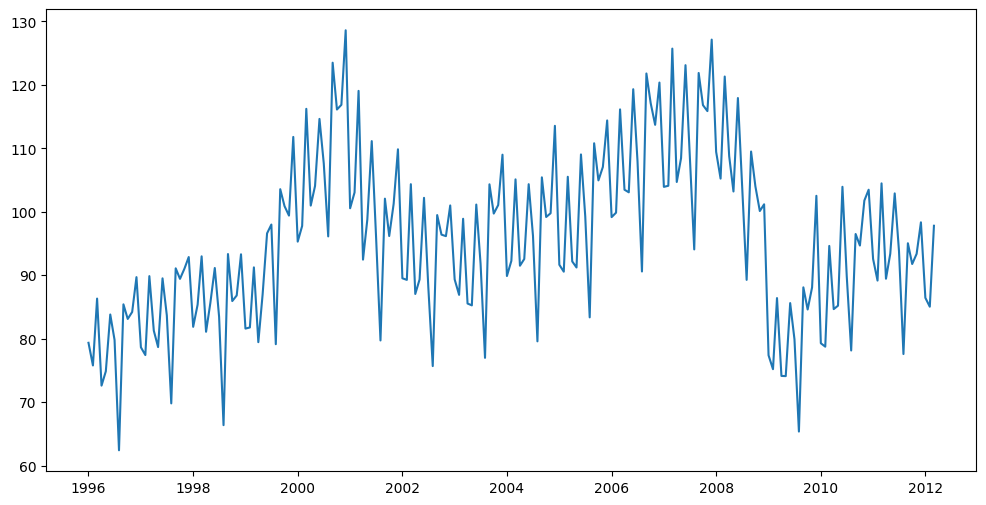

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [ ]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
# Add or change values

data.loc['2012-01-01','value'] = 86.45

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.45


# Moving average

In [ ]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12) # head, tail อาจเป็น nan ได้ปกติที่ขอบๆ

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
1996-06-01,6,83.81,NaN
1996-07-01,7,79.80,79.750417
1996-08-01,8,62.41,79.789167
1996-09-01,9,85.41,80.005000


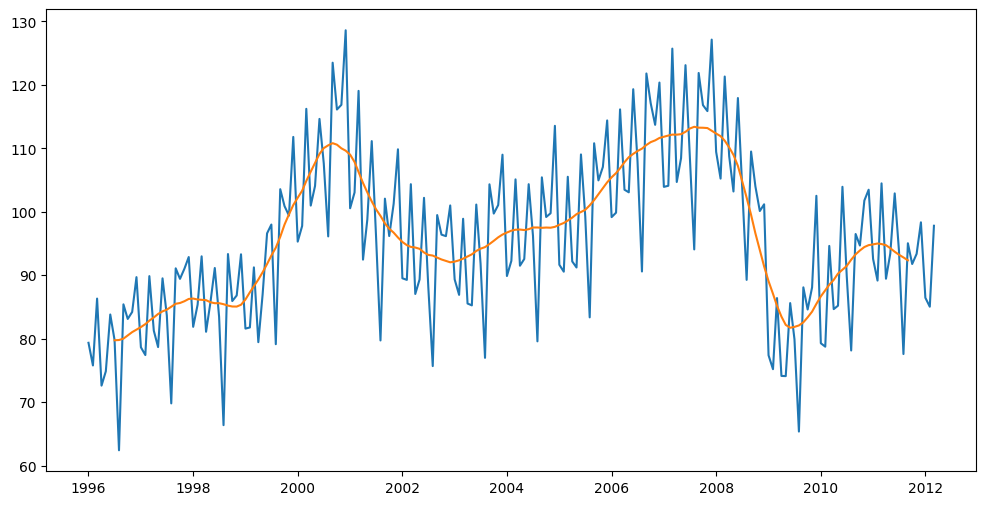

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

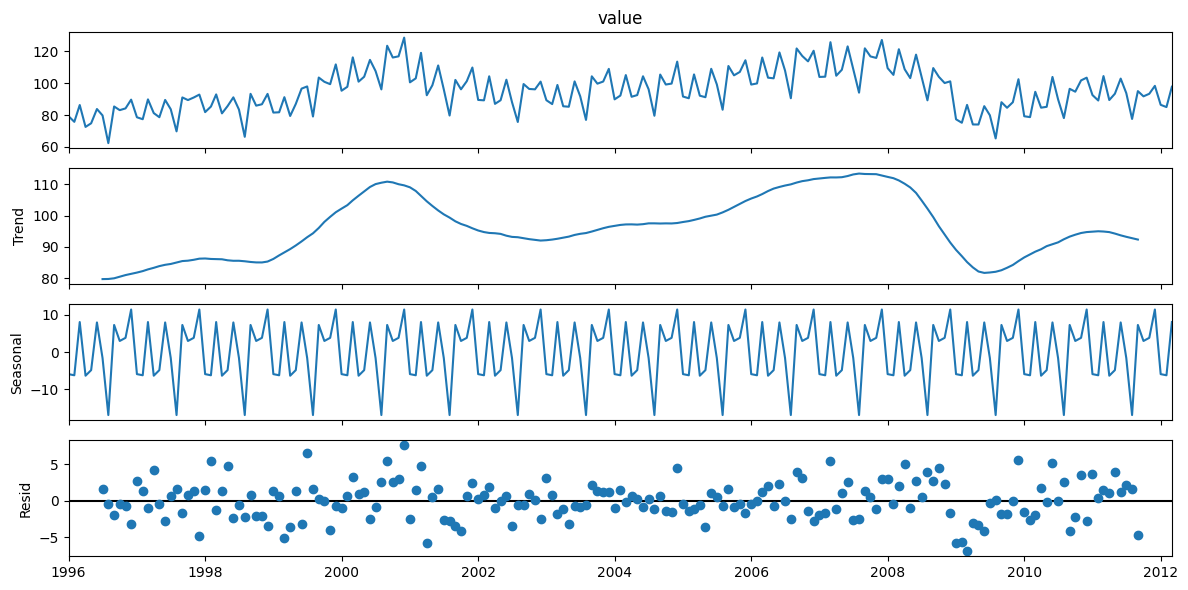

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #timeserie anlysis
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6)) #12*6
result_add = seasonal_decompose(data['value'], model='additive',period=12) #add period=12

result_add.plot();

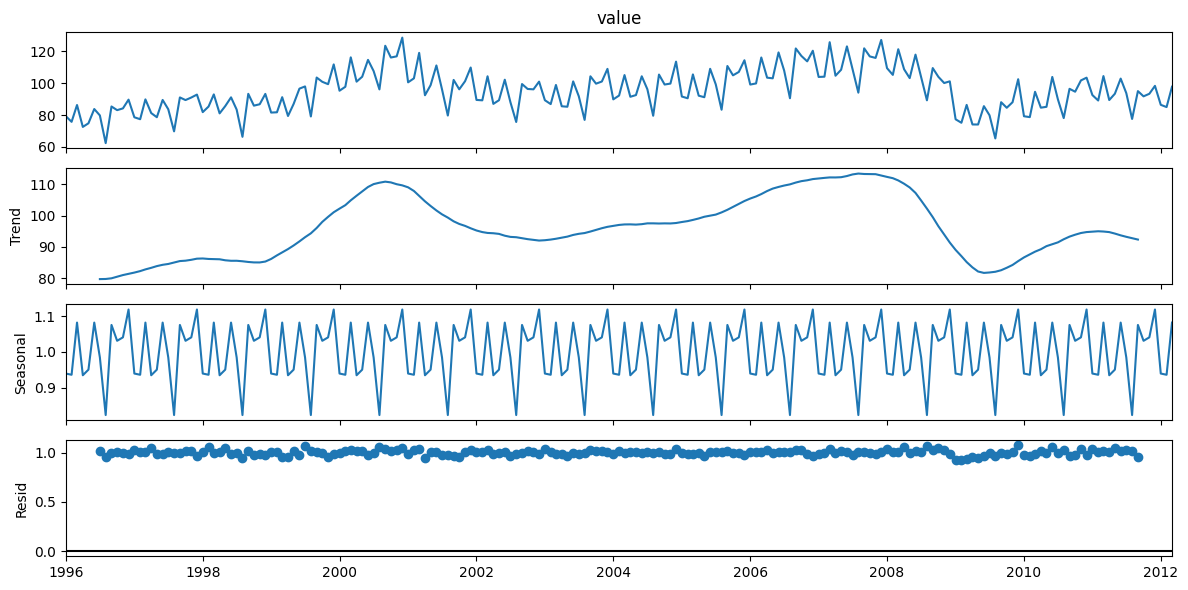

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative',period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend) #trend
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.887651
1996-02-01    -6.199262
1996-03-01     8.083182
1996-04-01    -6.314957
1996-05-01    -4.818457
                ...    
2011-11-01     3.847376
2011-12-01    11.447515
2012-01-01    -5.887651
2012-02-01    -6.199262
2012-03-01     8.083182
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.45
2012-02-01    85.04
2012-03-01    97

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้

1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  

1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set

1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  

3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [ ]:
train=data.loc['1996-01-01':'2009-12-01']
test=data.loc['2010-01-01':'2012-03-01']
train


,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
...,...,...,...
2009-08-01,164,65.36,82.087083
2009-09-01,165,88.09,82.577500
2009-10-01,166,84.60,83.358750


In [ ]:
result = seasonal_decompose(train['value'], model='additive', period=12)  # period=12 สำหรับ monthly data
train['St'] = result.seasonal
train['Tt'] = result.trend
train['Rt'] = result.resid

/tmp/ipython-input-815907692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['St'] = result.seasonal
/tmp/ipython-input-815907692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Tt'] = result.trend
/tmp/ipython-input-815907692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [ ]:
train.head(12)

,Unnamed: 0,value,MA,St,Tt,Rt
time,,,,,,
1996-01-01,1,79.35,NaN,-5.985857,NaN,NaN
1996-02-01,2,75.78,NaN,-5.957941,NaN,NaN
1996-03-01,3,86.32,NaN,8.183245,NaN,NaN
1996-04-01,4,72.60,NaN,-6.462428,NaN,NaN
1996-05-01,5,74.86,NaN,-5.041178,NaN,NaN
1996-06-01,6,83.81,NaN,7.552989,NaN,NaN
1996-07-01,7,79.80,79.750417,-1.640954,79.750417,1.690537
1996-08-01,8,62.41,79.789167,-17.138902,79.789167,-0.240264
1996-09-01,9,85.41,80.005000,8.178886,80.005000,-2.773886


In [ ]:

# หา last valid Tt+Rt ของ train
last_valid_index = (train['Tt'] + train['Rt']).last_valid_index()
last_Tt_Rt = (train['Tt'] + train['Rt']).loc[last_valid_index]


seasonal_pattern = result.seasonal[-12:]
repeat_times = len(test) // 12 + 1
test_St = np.tile(seasonal_pattern, repeat_times)[:len(test)]

test['St'] = test_St

test['predicted'] = last_Tt_Rt + test['St']


/tmp/ipython-input-487898568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['St'] = test_St
/tmp/ipython-input-487898568.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = last_Tt_Rt + test['St']


In [ ]:
last_Tt_Rt

np.float64(78.05701121794871)

In [ ]:
test.head()

,Unnamed: 0,value,MA,St,predicted
time,,,,,
2010-01-01,169,79.28,86.665417,-5.985857,72.071154
2010-02-01,170,78.74,87.613333,-5.957941,72.099071
2010-03-01,171,94.62,88.496250,8.183245,86.240256
2010-04-01,172,84.66,89.266667,-6.462428,71.594583
2010-05-01,173,85.20,90.256667,-5.041178,73.015833


In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))
  plt.figure(figsize=(12,6))
error = rmse(test['value'], test['predicted'])
print("RMSE =", error)


RMSE = 14.590131827031344


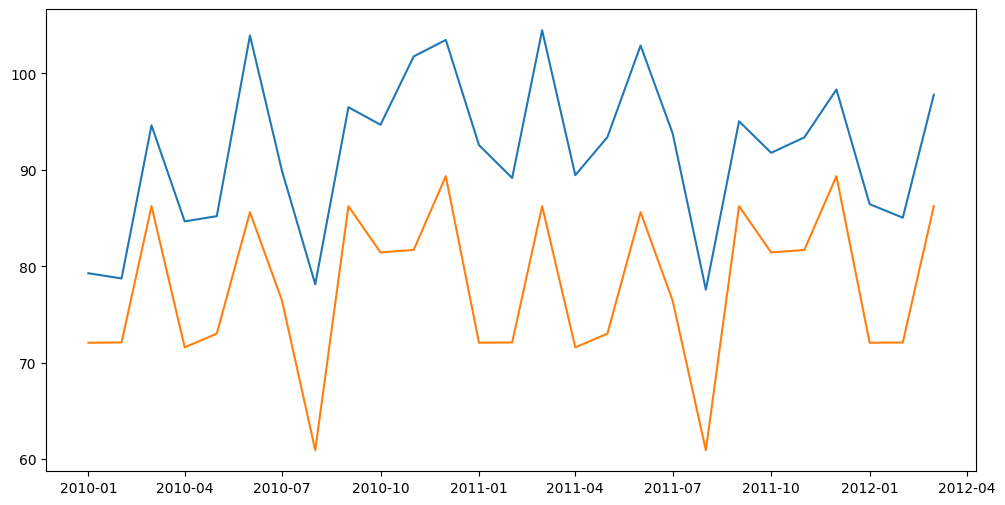

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test['value'])
plt.plot(test['predicted']);

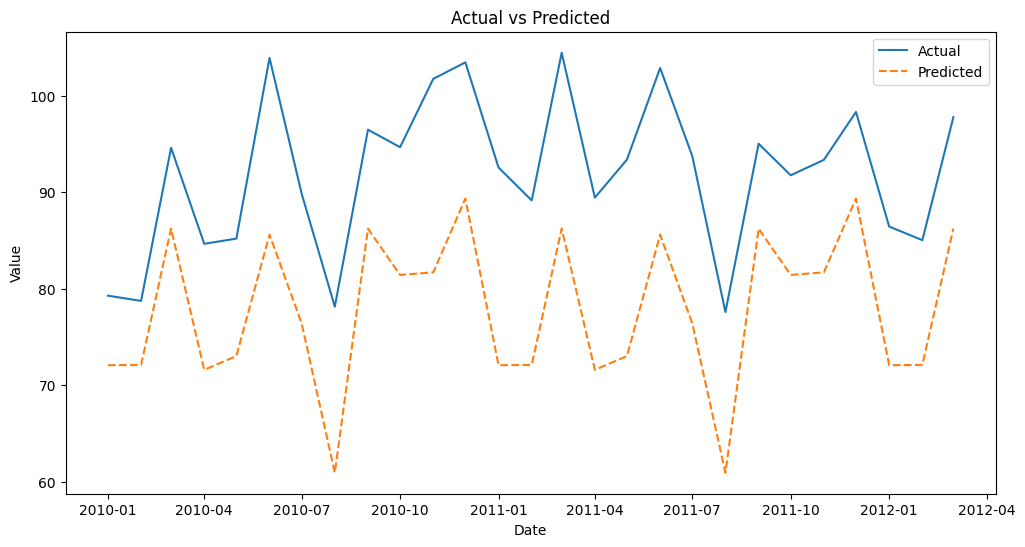

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test['value'], label='Actual')
plt.plot(test.index, test['predicted'], label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
